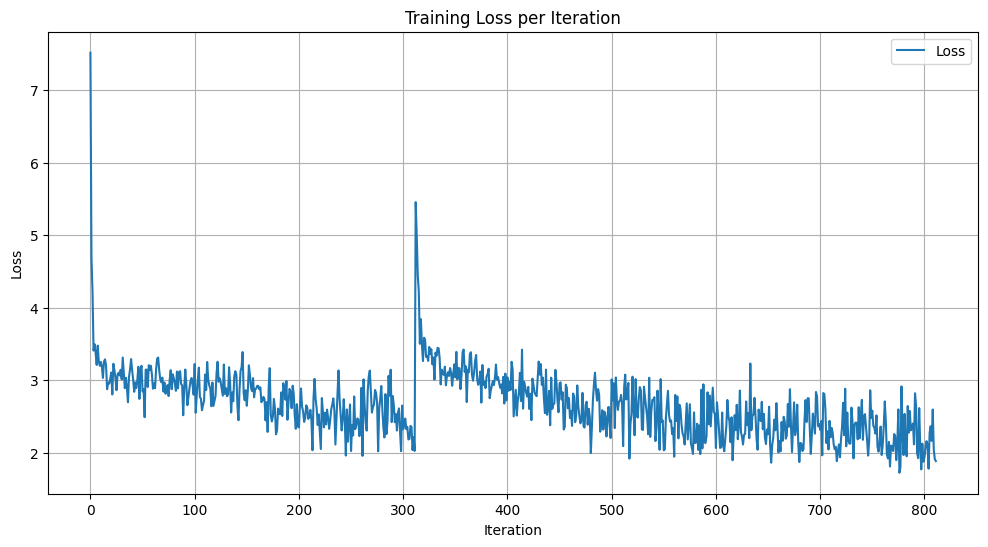

In [4]:
# Visualize DETR training loss from train.log

import re
import matplotlib.pyplot as plt
import numpy as np

log_path = "../sanity_check/train.log"  # Adjust path if needed

# Parse loss values
epochs, steps, losses = [], [], []
with open(log_path, "r") as f:
    for line in f:
        m = re.search(r"Epoch \[(\d+)/\d+\], Step \[(\d+)/\d+\], Loss: ([\d\.]+)", line)
        if m:
            epochs.append(int(m.group(1)))
            steps.append(int(m.group(2)))
            losses.append(float(m.group(3)))

# Plot
plt.figure(figsize=(12,6))
plt.plot(losses, label="Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss per Iteration")
plt.legend()
plt.grid(True)
plt.show()

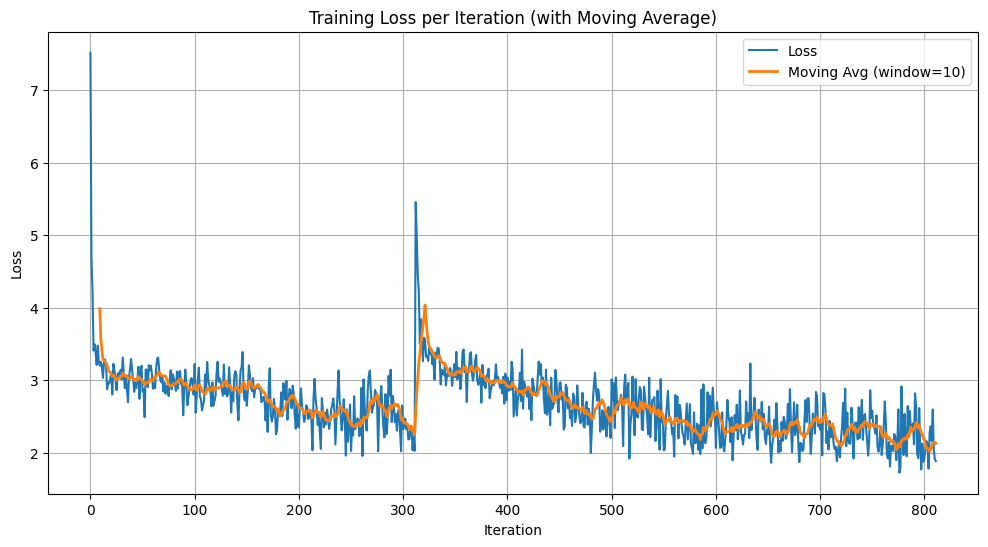

In [5]:
log_path = "../sanity_check/train.log"  # Adjust path if needed

# Parse loss values
epochs, steps, losses = [], [], []
with open(log_path, "r") as f:
    for line in f:
        m = re.search(r"Epoch \[(\d+)/\d+\], Step \[(\d+)/\d+\], Loss: ([\d\.]+)", line)
        if m:
            epochs.append(int(m.group(1)))
            steps.append(int(m.group(2)))
            losses.append(float(m.group(3)))

# Moving average
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

ma_window = 10  # You can adjust the window size
losses_ma = moving_average(losses, window_size=ma_window)

# Plot
plt.figure(figsize=(12,6))
plt.plot(losses, label="Loss")
plt.plot(range(ma_window-1, len(losses)), losses_ma, label=f"Moving Avg (window={ma_window})", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss per Iteration (with Moving Average)")
plt.legend()
plt.grid(True)
plt.show()